# Self-Organizing Maps (SOMs) Notebook
## Make composites from specified variable over all winters for a particular decade

**Notebook by Alice DuVivier (NCAR).**

**Still very much in progress**

In [1]:
import pandas as pd
from minisom import MiniSom, asymptotic_decay
import xarray as xr
import cftime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cls
from itertools import product
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from datetime import timedelta
from itertools import product
import seaborn as sns
import dask
import cmocean
import geocat.viz.util as gvutil

## Set some details for region

In [17]:
# set the location of the already extracted training data
sector_short = 'Ross'
path_in = '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/analysis/'+sector_short+'_analysis_v3/'
path_out = path_in+'figures_outline/'

In [3]:
# set region of interest - for plotting
titles     = ['Ross Sea', 'Amundsen Bellingshausen Sea', 'Weddell Sea', 'Pacific Ocean', 'Indian Ocean']
shorts     = ['Ross', 'AMB', 'Wed', 'Pac', 'Ind']
masks      = ['Ross_mask', 'BAm_mask', 'Wed_mask', 'Pac_mask', 'Ind_mask']
#lat_maxes  = [-65, -65, -65, -60, -60] 
#lat_mins   = [-87, -85, -85, -80, -80]
#lon_maxes  = [210, 300, 300, 90, 160] 
#lon_mins   = [150, 220, 20, 20, 90]
#lon_avgs   = [180, 260, 340, 55, 125]


lat_maxes  = [-72, -65, -65, -60, -60] 
lat_mins   = [-80, -85, -85, -80, -80]
lon_maxes  = [200, 300, 300, 90, 160] 
lon_mins   = [160, 220, 20, 20, 90]
lon_avgs   = [190, 260, 340, 55, 125]

In [4]:
# Based on sector set at top of script, set plotting limits
ind = shorts.index(sector_short)
sector_title = titles[ind]
mask_in = masks[ind]
lat_max = lat_maxes[ind]
lat_min = lat_mins[ind]
lon_max = lon_maxes[ind]
lon_min = lon_mins[ind]
lon_avg = lon_avgs[ind]

In [5]:
# set path to the pulled data
# Note data is for larger area than only training points
# this data has been processed all the same 'time' coordinates as training data
data_path_in = '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/DATA/data_for_composites/'


### Load in wind data

In [6]:
# variable
var_composite_in = 'U10'

# file name for training variable only here 
fin_composite = 'antarctic_data_for_som_composites_'+var_composite_in

# load data
#ds_wind = xr.open_mfdataset(data_path_in+fin_composite+'.nc')
ds_wind = xr.open_mfdataset(data_path_in+fin_composite+'_allSH.nc')

print('loaded '+var_composite_in)

loaded U10


## Calculate the mean for all winter by decade

In [7]:
# calculate winter mean against which to do anomalies
mean_all_wind = ds_wind.data.mean(dim='training_times')

In [8]:
decade_names = ['1980','1990', '2000', '2010', '2020', '2030', '2040', '2050', '2060', '2070']

In [9]:
# make numpy array to fill and specify dimensions we want
decade_array_wind = np.zeros([len(decade_names),len(mean_all_wind.lat),len(mean_all_wind.lon)])

for dd in decade_names:
    print('decade: '+dd+'s')
    if dd == '1980':
        d_count = 0
        yy_st = 1980
    else: 
        d_count = d_count+1
        yy_st = yy_st + 10
    # get years for this decade
    yy_ed = yy_st + 10
    yy_all = list(range(yy_st,yy_ed,1))
    # get mean for this decade
    decade_array_wind[d_count,:,:] = ds_wind.data.isel(training_times=ds_wind.time.dt.year.isin([yy_all])).mean(dim='training_times')


decade: 1980s


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 1990s


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2000s


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2010s


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2020s


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2030s


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2040s


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2050s


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2060s


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2070s


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [10]:
print(decade_array_wind.shape)

(10, 74, 288)


In [11]:
# convert the numpy array to a xarray for easier plotting
decade_means_wind = xr.DataArray(decade_array_wind,dims=('decade','lat','lon'))

In [12]:
# set coordinate arrays
decade_means_wind['decade'] = decade_names
decade_means_wind['lat'] = mean_all_wind['lat'].values
decade_means_wind['lon'] = mean_all_wind['lon'].values

## Make all SH plot for supplementary figure

In [13]:
# wind details
title_in = '10m wind speed'
units = 'm/s'
levels_in = np.arange(0,15,1)  
ticks_in = [0,2,4,6,8,10,12,14]
cmap_in = cmocean.cm.tempo    

levels_diff = np.arange(-3,3.5,0.5) 
ticks_diff = [-3,-2,-1,0,1,2,3]
cmap_diff = cmocean.cm.diff

In [14]:
# Based set plotting limits for zoom out
lat_max_big = -50
lat_min_big = -90
lon_max_big = 360
lon_min_big = 0.005
lon_avg_big = 180

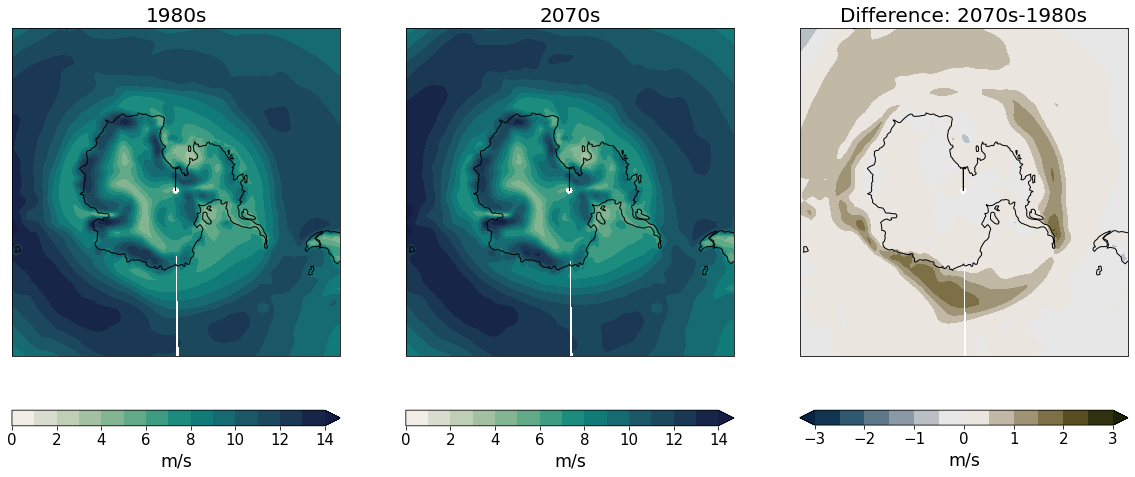

In [19]:
## 2070's difference figure
tag = '2070'

# get data
data_ctrl = decade_means_wind.sel(decade='1980')
data_in = decade_means_wind.sel(decade=tag)
# create difference
data_diff = data_in - data_ctrl
# get lats/lons for plotting
lons = ds_wind.lon
lats = ds_wind.lat

# create figure
fig = plt.figure(figsize=(20,20))
fout = path_out+'supp_fig14_U10'
title = 'Winter (JAS) mean '+title_in+' and differences ('+tag+'s-1980s) in '+sector_short+' Sea'

# plot the subplots - note it's nrow x ncol x index (starting upper left)

### mean over 1980s
ax = fig.add_subplot(1,3,1, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg_big) )
this = ax.contourf(lons,lats,
                   data_ctrl,
                   transform=ccrs.PlateCarree(),
                   cmap = cmap_in,
                   levels=levels_in, extend='max')
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_in,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(units, fontsize='xx-large')
# set final plot details
ax.set_extent([lon_min_big,lon_max_big,lat_min_big,lat_max_big], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
plt.title('1980s',fontsize=20)

### mean future
ax = fig.add_subplot(1,3,2, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg_big) )
this = ax.contourf(lons,lats,
                   data_in,
                   transform=ccrs.PlateCarree(),
                   cmap = cmap_in,
                   levels=levels_in, extend='max')
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_in,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(units, fontsize='xx-large')
# set final plot details
ax.set_extent([lon_min_big,lon_max_big,lat_min_big,lat_max_big], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
plt.title(tag+'s',fontsize=20)

### diff
ax = fig.add_subplot(1,3,3, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg_big) )
this = ax.contourf(lons,lats,
                     data_diff,
                     transform=ccrs.PlateCarree(),
                     cmap = cmap_diff,
                     levels=levels_diff, extend='both')
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_diff,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(units, fontsize='xx-large')
# set final plot details
ax.set_extent([lon_min_big,lon_max_big,lat_min_big,lat_max_big], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
plt.title('Difference: '+tag+'s-1980s',fontsize=20)

# Finalize figure and save
#fig.suptitle(title,fontsize=15, y=0.90)  
#fig.subplots_adjust(hspace=0.2)
fig = plt.savefig(fout+'.png', bbox_inches='tight', dpi=200)